### Figure 2 upper panel upper row and Suppelementary Table 1:
recommended run in docker: docker run -it --rm -p 1977:8888 -v .Data:/Data amiklos/simnibs:1.10

In [1]:
from simnibs import sim_struct, run_simnibs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import regions as rg
import os.path
from os import path
from scipy import stats

In [272]:
cogsga = pd.read_csv('/Data/IPER.COG.csv')
volsga = pd.read_csv('/Data/VOL_IPER.csv')
cogsga
#volsga

,X,Unnamed..0,id,mem.1,mem.5,mem.12,grid,ECTnum,allenerg,Cerebellum.Cortex,...,ctx.rostralmiddlefrontal,ctx.superiorfrontal,ctx.superiorparietal,ctx.superiortemporal,ctx.supramarginal,ctx.frontalpole,ctx.temporalpole,ctx.transversetemporal,ctx.insula,VOL.TotalGrayVol
0,0,1,9d08099943f8627959cfb8ecee0d2f5d,90,92,82.0,795c390abd48b5cad227b2e96c1a3e16,8,30.625000,-2.299512,...,0.311031,2.429463,0.031110,0.565496,0.913615,0.078177,10.579000,-0.473201,-0.590462,0.568808
1,1,2,71db8a6cad03244e6e50f0ad8bc95a65,73,68,79.0,6f644d1d51e2b49b5224a3ff935a9655,8,20.000000,0.446436,...,1.355402,3.166488,-0.421040,3.855396,3.093721,-0.210801,9.629112,2.377264,6.291391,1.742618
2,2,3,8f3571abef23f6aca0f7b8666a74e7e0,101,100,93.0,32662a3746b670021c90b323dfde55b7,8,25.000000,-1.847321,...,-5.111159,-6.350453,-5.200642,-2.112740,-6.857598,-8.449729,-14.325012,-5.738244,-3.092778,-4.189905
3,3,4,fa5a4df7ac0f9782037da890557fd8b8,93,79,70.0,8d2070e558075de87b5a5c2c31585efa,9,36.666667,-1.064047,...,2.949420,2.481709,3.742506,3.885836,1.192300,4.851703,11.890221,1.947134,5.930453,2.160720
4,4,5,8ae1ac7bdf62dca7c19b427a9153445c,67,76,64.0,36a9c80a8408e39669825b596537b038,8,20.000000,0.758935,...,-0.596254,1.205959,-1.095247,0.196053,-1.501067,-1.527403,-0.173925,-0.400194,1.021808,0.095358
5,5,6,06cd248dd1409b804444bd9ad5533d1d,100,95,108.0,268d16203240a2671e55b5a2a3caf04b,8,45.000000,-1.273010,...,-0.591931,0.999787,-2.663701,-2.182078,-1.330370,2.399003,1.000548,-2.245427,-1.125815,-0.911500
6,6,7,e03a89536262b6a0e2beabd90a841c43,137,123,127.0,728d823e3f31ef549f28447718be3f86,8,21.250000,-0.786734,...,-0.650472,0.685615,0.739128,0.089547,0.743162,3.386955,4.187202,-1.581833,0.489349,-0.491578
7,8,9,e6e598642c5fbbfb7d922dbfcec86ed8,80,70,75.0,675b9c16a35f512c9d533e88b7666467,8,48.125000,0.926866,...,-1.066246,0.772920,0.616371,0.702975,-0.115938,-6.426611,-0.420811,-0.859925,7.181833,0.263204
8,9,10,1b0ed73227e2e7826da63b2b356975e0,100,94,NaN,792411d993fe0e9062c7f74ddb56de28,6,41.666667,1.846604,...,1.650612,2.495081,4.609166,2.647392,2.926780,3.964944,1.573794,4.579958,4.090992,3.065445
9,10,11,5462ea21bef8d27d5a0ea4da35939549,86,92,88.0,e210c9f08d94a9e9fb3cf6c36cebc037,8,15.000000,0.300621,...,-0.990520,0.344439,-0.844469,0.555687,0.279292,3.713194,3.170766,-1.802639,-0.952852,0.412239


In [236]:
volsga.columns[10:52].values.astype('str')


array(['Thalamus.Proper', 'Caudate', 'Putamen', 'Pallidum', 'Hippocampus',
       'Amygdala', 'Accumbens.area', 'VentralDC',
       'ctx.caudalanteriorcingulate', 'ctx.caudalmiddlefrontal',
       'ctx.cuneus', 'ctx.entorhinal', 'ctx.fusiform',
       'ctx.inferiorparietal', 'ctx.inferiortemporal',
       'ctx.isthmuscingulate', 'ctx.lateraloccipital',
       'ctx.lateralorbitofrontal', 'ctx.lingual',
       'ctx.medialorbitofrontal', 'ctx.middletemporal',
       'ctx.parahippocampal', 'ctx.paracentral', 'ctx.parsopercularis',
       'ctx.parsorbitalis', 'ctx.parstriangularis', 'ctx.pericalcarine',
       'ctx.postcentral', 'ctx.posteriorcingulate', 'ctx.precentral',
       'ctx.precuneus', 'ctx.rostralanteriorcingulate',
       'ctx.rostralmiddlefrontal', 'ctx.superiorfrontal',
       'ctx.superiorparietal', 'ctx.superiortemporal',
       'ctx.supramarginal', 'ctx.frontalpole', 'ctx.temporalpole',
       'ctx.transversetemporal', 'ctx.insula', 'VOL.TotalGrayVol'],
      dtype='<U28')

In [238]:
labels = pd.read_table('/Data/FreeSurferColorLUT.txt',delim_whitespace=True, comment='#')
y=[x.replace('Left-','') for x in labels['Label_Name'].astype('str')]
z=[x.replace('Right-','') for x in y]
zz=[x.replace('-','.') for x in z]
zzz=[x.replace('lh.','') for x in zz]
zzzz=[x.replace('rh.','') for x in zzz]
labels['pointer']='na'
labels

,Id,Label_Name,R,G,B,A,pointer
0,0,Unknown,0,0,0,0,na
1,1,Left-Cerebral-Exterior,70,130,180,0,na
2,2,Left-Cerebral-White-Matter,245,245,245,0,na
3,3,Left-Cerebral-Cortex,205,62,78,0,na
4,4,Left-Lateral-Ventricle,120,18,134,0,na
...,...,...,...,...,...,...,...
1287,14171,wm_rh_S_suborbital,21,20,60,0,na
1288,14172,wm_rh_S_subparietal,101,60,60,0,na
1289,14173,wm_rh_S_temporal_inf,21,180,180,0,na
1290,14174,wm_rh_S_temporal_sup,223,220,60,0,na


In [240]:
m=0
for x in volsga.columns:
  i = np.where(np.array(zzzz) == x)
  for k in i:
      labels['pointer'][k]=m  
      #print(i)
  
  m=m+1
labels[0:50]

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """



,Id,Label_Name,R,G,B,A,pointer
0,0,Unknown,0,0,0,0,na
1,1,Left-Cerebral-Exterior,70,130,180,0,na
2,2,Left-Cerebral-White-Matter,245,245,245,0,na
3,3,Left-Cerebral-Cortex,205,62,78,0,na
4,4,Left-Lateral-Ventricle,120,18,134,0,na
5,5,Left-Inf-Lat-Vent,196,58,250,0,na
6,6,Left-Cerebellum-Exterior,0,148,0,0,na
7,7,Left-Cerebellum-White-Matter,220,248,164,0,na
8,8,Left-Cerebellum-Cortex,230,148,34,0,9
9,9,Left-Thalamus,0,118,14,0,na


In [241]:
import nilearn as nl
from nilearn.image import smooth_img, concat_imgs,get_data, new_img_like
from nilearn import plotting, datasets  
#img=nl.image.load_img('/work/SGAECT/atlases/aparc_in_MNI.nii')
img=nl.image.load_img('/Data/OASIS-TRT-20_jointfusion_DKT31_CMA_labels_in_MNI152_v2.nii.gz')
imgM = get_data(img)
imgM.shape
#imgO = np.memmap('/work/SGAECT/atlases/temp3', dtype='float32', mode='w+', shape=imgM.shape)
imgO = np.zeros_like(imgM)
#imgO[90,90,90]
#imgO

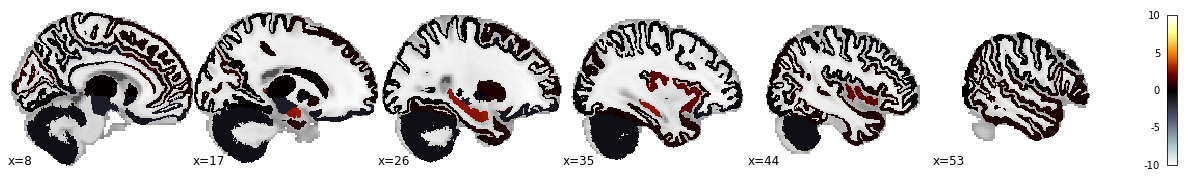

In [242]:
#imgO.shape
m=0
for i in labels['Id']:
    if i==47:
        i=45#this is miscoded in image code text file
    ind=np.where(imgM==i)
    #imgO[ind]=fincode['value'][m]
    w=labels['pointer'][m]
    if w != 'na':
      t=np.transpose(volsga).iloc[w].mean()
      imgO[ind]=t
    m=m+1
#ind=np.where(imgM==2035)
outimg = new_img_like(img, imgO)

#plotting.plot_stat_map(outimg, display_mode='x', symmetric_cbar=True, colorbar=True, vmax=10, cut_coords=[53,44,35,26,17,8], cmap='hot_black_bone_r', output_file='/Data/SGA_VOLUME_ch.png')
plotting.plot_stat_map(outimg, display_mode='x', symmetric_cbar=True, colorbar=True, vmax=10, cut_coords=[53,44,35,26,17,8], cmap='hot_black_bone_r')

In [244]:
cogsga.columns

Index(['X', 'id', 'time', 'immem', 'visus', 'langu', 'atten', 'demem',
       'total'],
      dtype='object')

In [307]:
cogsga_pivot=pd.pivot_table(cogsga,index='id', columns='time', values=['immem', 'visus', 'langu', 'atten', 'demem',
       'total'])
cogsgadf2 = pd.DataFrame(cogsga_pivot.to_records())
cogsgadf2.columns=['id', 'atten_1', 'atten_5', 'atten_12', 'demem_1',
       'demem_5', 'demem_12', 'immem_1', 'immem_5',
       'immem_12', 'langu_1', 'langu_5', 'langu_12',
       'total_1', 'total_5', 'total_12', 'visus_1',
       'visus_5', 'visus_12']
from scipy.stats import norm
cogsgadf=cogsgadf2
for i in ['atten_1', 'atten_5', 'atten_12', 'demem_1','demem_5', 'demem_12', 'immem_1', 'immem_5', 'immem_12', 'langu_1', 'langu_5', 'langu_12','total_1', 'total_5', 'total_12', 'visus_1', 'visus_5', 'visus_12']:
  t=norm.ppf(norm.cdf(cogsgadf2[i], loc=100, scale=15),loc=50,scale=10).round()
  cogsgadf[i]=t

cogsgadf

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)

[ simnibs ]WARNING: /root/SimNIBS/miniconda3/envs/simnibs_env/lib/python3.7/site-packages/scipy/stats/_distn_infrastr

,id,atten_1,atten_5,atten_12,demem_1,demem_5,demem_12,immem_1,immem_5,immem_12,langu_1,langu_5,langu_12,total_1,total_5,total_12,visus_1,visus_5,visus_12
0,06cd248dd1409b804444bd9ad5533d1d,50.0,52.0,52.0,49.0,44.0,55.0,59.0,56.0,69.0,41.0,39.0,38.0,50.0,47.0,55.0,50.0,50.0,56.0
1,1b0ed73227e2e7826da63b2b356975e0,52.0,46.0,NaN,54.0,37.0,NaN,58.0,59.0,NaN,43.0,45.0,NaN,50.0,46.0,NaN,43.0,50.0,NaN
2,263b9db4d09244c0e0ff3f826caa8d2e,69.0,71.0,78.0,48.0,21.0,53.0,63.0,67.0,69.0,53.0,45.0,58.0,56.0,48.0,74.0,41.0,41.0,64.0
3,285d156b1b700fbb489df058fdb9e2ee,44.0,38.0,36.0,48.0,39.0,46.0,54.0,46.0,43.0,43.0,41.0,58.0,43.0,36.0,39.0,39.0,29.0,29.0
4,5462ea21bef8d27d5a0ea4da35939549,40.0,48.0,40.0,48.0,31.0,39.0,41.0,65.0,58.0,38.0,38.0,41.0,41.0,45.0,42.0,50.0,50.0,45.0
5,569ddf8dcb5af0cbc7177be6a8b9700d,31.0,31.0,NaN,48.0,46.0,NaN,43.0,56.0,NaN,41.0,53.0,NaN,35.0,40.0,NaN,26.0,29.0,NaN
6,71db8a6cad03244e6e50f0ad8bc95a65,40.0,40.0,36.0,40.0,39.0,46.0,34.0,32.0,40.0,33.0,19.0,33.0,32.0,29.0,36.0,31.0,35.0,39.0
7,7d2842cab7725fd8f382293e410d42b2,65.0,69.0,NaN,48.0,48.0,NaN,58.0,54.0,NaN,44.0,47.0,NaN,49.0,56.0,NaN,31.0,56.0,NaN
8,8ae1ac7bdf62dca7c19b427a9153445c,33.0,36.0,21.0,37.0,39.0,21.0,46.0,39.0,43.0,21.0,43.0,35.0,28.0,34.0,26.0,26.0,29.0,35.0
9,8f3571abef23f6aca0f7b8666a74e7e0,62.0,67.0,58.0,51.0,46.0,42.0,54.0,43.0,43.0,43.0,41.0,45.0,51.0,50.0,45.0,45.0,56.0,47.0


In [308]:

cogsgadf['total_5_12']=cogsgadf[['total_5','total_12']].mean(axis=1)
cogsgadf['atten_5_12']=cogsgadf[['atten_5','atten_12']].mean(axis=1)
cogsgadf['demem_5_12']=cogsgadf[['demem_5','demem_12']].mean(axis=1)
cogsgadf['immem_5_12']=cogsgadf[['immem_5','immem_12']].mean(axis=1)
cogsgadf['langu_5_12']=cogsgadf[['langu_5','langu_12']].mean(axis=1)
cogsgadf['visus_5_12']=cogsgadf[['visus_5','visus_12']].mean(axis=1)

cogsgadf[['id','total_1','total_5','total_12']]
#transform to Tscore

,id,total_1,total_5,total_12
0,06cd248dd1409b804444bd9ad5533d1d,50.0,47.0,55.0
1,1b0ed73227e2e7826da63b2b356975e0,50.0,46.0,NaN
2,263b9db4d09244c0e0ff3f826caa8d2e,56.0,48.0,74.0
3,285d156b1b700fbb489df058fdb9e2ee,43.0,36.0,39.0
4,5462ea21bef8d27d5a0ea4da35939549,41.0,45.0,42.0
5,569ddf8dcb5af0cbc7177be6a8b9700d,35.0,40.0,NaN
6,71db8a6cad03244e6e50f0ad8bc95a65,32.0,29.0,36.0
7,7d2842cab7725fd8f382293e410d42b2,49.0,56.0,NaN
8,8ae1ac7bdf62dca7c19b427a9153445c,28.0,34.0,26.0
9,8f3571abef23f6aca0f7b8666a74e7e0,51.0,50.0,45.0


In [309]:
cogsgadf['dtotal']=cogsgadf['total_5_12']-cogsgadf['total_1']
cogsgadf['datten']=cogsgadf['atten_5_12']-cogsgadf['atten_1']
cogsgadf['ddemem']=cogsgadf['demem_5_12']-cogsgadf['demem_1']
cogsgadf['dimmem']=cogsgadf['immem_5_12']-cogsgadf['immem_1']
cogsgadf['dlangu']=cogsgadf['langu_5_12']-cogsgadf['langu_1']
cogsgadf['dvisus']=cogsgadf['visus_5_12']-cogsgadf['visus_1']



cogsgadf[['id','dtotal','datten','ddemem','dimmem','dlangu','dvisus']]

,id,dtotal,datten,ddemem,dimmem,dlangu,dvisus
0,06cd248dd1409b804444bd9ad5533d1d,1.0,2.0,0.5,3.5,-2.5,3.0
1,1b0ed73227e2e7826da63b2b356975e0,-4.0,-6.0,-17.0,1.0,2.0,7.0
2,263b9db4d09244c0e0ff3f826caa8d2e,5.0,5.5,-11.0,5.0,-1.5,11.5
3,285d156b1b700fbb489df058fdb9e2ee,-5.5,-7.0,-5.5,-9.5,6.5,-10.0
4,5462ea21bef8d27d5a0ea4da35939549,2.5,4.0,-13.0,20.5,1.5,-2.5
5,569ddf8dcb5af0cbc7177be6a8b9700d,5.0,0.0,-2.0,13.0,12.0,3.0
6,71db8a6cad03244e6e50f0ad8bc95a65,0.5,-2.0,2.5,2.0,-7.0,6.0
7,7d2842cab7725fd8f382293e410d42b2,7.0,4.0,0.0,-4.0,3.0,25.0
8,8ae1ac7bdf62dca7c19b427a9153445c,2.0,-4.5,-7.0,-5.0,18.0,6.0
9,8f3571abef23f6aca0f7b8666a74e7e0,-3.5,0.5,-7.0,-11.0,0.0,6.5


In [310]:
hamd=pd.read_csv('/Data/hamd_cr.csv')
bp=hamd[['id','cr']].drop_duplicates()
bp.columns=['id','cr']
bp

,id,cr
0,06cd248dd1409b804444bd9ad5533d1d,-0.134289
12,1b0ed73227e2e7826da63b2b356975e0,-0.447848
18,263b9db4d09244c0e0ff3f826caa8d2e,0.271945
29,285d156b1b700fbb489df058fdb9e2ee,-0.027879
41,5462ea21bef8d27d5a0ea4da35939549,0.418059
53,569ddf8dcb5af0cbc7177be6a8b9700d,-0.226328
63,71db8a6cad03244e6e50f0ad8bc95a65,0.049720
75,7d2842cab7725fd8f382293e410d42b2,-0.312782
87,8ae1ac7bdf62dca7c19b427a9153445c,0.193333
99,8f3571abef23f6aca0f7b8666a74e7e0,0.411625


In [311]:
alld1 = volsga[volsga.columns[0:52]].merge(cogsgadf[['id','dtotal','datten','ddemem','dimmem','dlangu','dvisus']], on='id', how='left')
alld1
alld = pd.merge(alld1,bp, on='id')
alld.columns[0:59]

Index(['X', 'Unnamed..0', 'id', 'mem.1', 'mem.5', 'mem.12', 'grid', 'ECTnum',
       'allenerg', 'Cerebellum.Cortex', 'Thalamus.Proper', 'Caudate',
       'Putamen', 'Pallidum', 'Hippocampus', 'Amygdala', 'Accumbens.area',
       'VentralDC', 'ctx.caudalanteriorcingulate', 'ctx.caudalmiddlefrontal',
       'ctx.cuneus', 'ctx.entorhinal', 'ctx.fusiform', 'ctx.inferiorparietal',
       'ctx.inferiortemporal', 'ctx.isthmuscingulate', 'ctx.lateraloccipital',
       'ctx.lateralorbitofrontal', 'ctx.lingual', 'ctx.medialorbitofrontal',
       'ctx.middletemporal', 'ctx.parahippocampal', 'ctx.paracentral',
       'ctx.parsopercularis', 'ctx.parsorbitalis', 'ctx.parstriangularis',
       'ctx.pericalcarine', 'ctx.postcentral', 'ctx.posteriorcingulate',
       'ctx.precentral', 'ctx.precuneus', 'ctx.rostralanteriorcingulate',
       'ctx.rostralmiddlefrontal', 'ctx.superiorfrontal',
       'ctx.superiorparietal', 'ctx.superiortemporal', 'ctx.supramarginal',
       'ctx.frontalpole', 'ctx.tempor

In [312]:
found=alld.columns[9:59]
domains=['datten','ddemem','dimmem','dlangu','dvisus','cr','dtotal']
alld[found]


,Cerebellum.Cortex,Thalamus.Proper,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbens.area,VentralDC,ctx.caudalanteriorcingulate,...,ctx.transversetemporal,ctx.insula,VOL.TotalGrayVol,dtotal,datten,ddemem,dimmem,dlangu,dvisus,cr
0,-2.299512,-0.988892,1.855902,1.088173,1.017708,1.454264,-0.567370,3.064702,0.105413,-1.044766,...,-0.473201,-0.590462,0.568808,-1.5,3.0,-9.0,-10.0,-6.0,1.0,-0.482955
1,0.446436,1.929531,1.495964,-0.029522,-1.889863,4.134597,5.554863,2.673717,-0.349851,5.355867,...,2.377264,6.291391,1.742618,0.5,-2.0,2.5,2.0,-7.0,6.0,0.049720
2,-1.847321,-5.353985,-3.455372,0.575597,-1.698045,1.084443,2.858925,0.273760,-4.869051,-2.018919,...,-5.738244,-3.092778,-4.189905,-3.5,0.5,-7.0,-11.0,0.0,6.5,0.411625
3,-1.064047,0.781122,1.575551,-0.472925,2.170937,4.391854,2.653290,-5.736565,-1.755810,1.203248,...,1.947134,5.930453,2.160720,-12.0,0.0,-14.0,-17.5,-17.5,-5.0,0.551166
4,0.758935,1.985670,3.093142,3.029242,-6.620489,3.704972,0.105776,3.230774,-0.633665,-0.631154,...,-0.400194,1.021808,0.095358,2.0,-4.5,-7.0,-5.0,18.0,6.0,0.193333
5,-1.273010,-0.971864,-1.381392,-1.174168,2.084161,0.525724,-1.011293,0.302086,0.415455,0.160204,...,-2.245427,-1.125815,-0.911500,1.0,2.0,0.5,3.5,-2.5,3.0,-0.134289
6,-0.786734,-1.245620,-5.279917,-2.075629,2.477649,3.646770,7.397831,-5.774150,0.343092,-3.330882,...,-1.581833,0.489349,-0.491578,-8.5,-0.5,7.0,0.0,-10.0,-15.0,-0.354267
7,0.926866,-1.853205,-3.014250,-4.155190,4.172661,4.067754,0.091139,-13.775405,-4.595258,7.022131,...,-0.859925,7.181833,0.263204,-5.5,-5.5,-23.5,-5.5,1.0,14.0,0.406086
8,1.846604,1.391741,2.869989,0.243187,0.912113,5.796044,6.381484,3.371814,0.156211,5.150813,...,4.579958,4.090992,3.065445,-4.0,-6.0,-17.0,1.0,2.0,7.0,-0.447848
9,0.300621,0.788981,1.172395,0.097618,5.112315,0.751821,1.391833,-5.771457,0.607109,-1.183037,...,-1.802639,-0.952852,0.412239,2.5,4.0,-13.0,20.5,1.5,-2.5,0.418059


In [314]:
from IPython.core.display import HTML
from scipy import stats
#df=pd.read_pickle('Data1')
#display(HTML(df.to_html()))
for i in range(0,7):
    myone = stats.ttest_1samp(alld[found],0, nan_policy='omit')
    sig = myone[1]<0.05
    #cc = pd.DataFrame(iper_ef_vol2[found].corr()['dcog12'])[:-2]
    cc = pd.DataFrame(alld[found].corr()[domains[i]])
    #onesamp = pd.DataFrame([myone[0],myone[1]]).T
    #onesamp.columns=['tval','pval']
    cohens=alld[found].mean()/alld[found].std()
    #mch=alld[found].mean()
    mch=alld[found].corr()['cr'].values

    onesamp = pd.DataFrame([mch,cohens.values,myone[1].data]).T
    onesamp.columns=['hamd','d','pval']
    onesamp.shape
    

    onesamp.index=cc.index
    onesamp['roi']=onesamp.index
    cc['roi']=cc.index
    if i==0:
        resiper= pd.merge(cc,onesamp)
        resiper2=resiper[0:]#.rename(columns={'dcog12':domains[i]})
    else:
        resiper2=pd.merge(cc,resiper2)
        #resiper2=resiper2.rename(columns={'dcog12':domains[i]})

display(HTML(resiper2.to_html()))
#resiper2.to_csv('/Data/IPER_results_HAMD_dcogav.csv')